In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


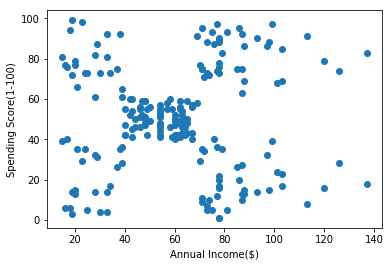

In [182]:
X = mall.iloc[:,[3,4]].values
plt.scatter(X[:,0] , X[:,1])
plt.xlabel('Annual Income($)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# How much cluster?
Elbow Method

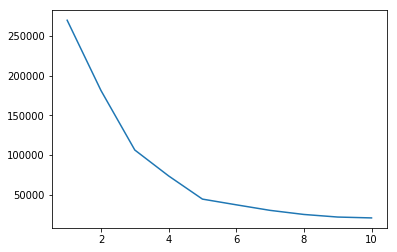

In [183]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
        kmean = KMeans(n_clusters= i , init = 'k-means++', max_iter = 300, n_init=10, random_state= 0)
        kmean.fit(X)
        wcss.append(kmean.inertia_)
plt.plot(range(1,11), wcss)

##  so 5 cluster

In [209]:
kmean = KMeans(n_clusters= 5 , init = 'k-means++', max_iter = 300, n_init=10, random_state= 0)
y_kmean = kmean.fit_predict(X)

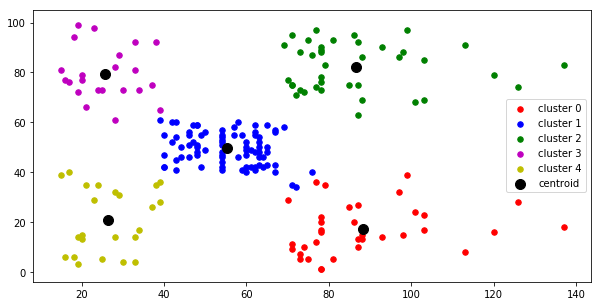

In [210]:
plt.figure(figsize = [10,5])
plt.scatter(X[y_kmean == 0, 0], X[y_kmean == 0, 1], s = 30, c= 'r', label = 'cluster 0')
plt.scatter(X[y_kmean == 1, 0], X[y_kmean == 1, 1], s = 30, c= 'b', label = 'cluster 1')
plt.scatter(X[y_kmean == 2, 0], X[y_kmean == 2, 1], s = 30, c= 'g', label = 'cluster 2')
plt.scatter(X[y_kmean == 3, 0], X[y_kmean == 3, 1], s = 30, c= 'm', label = 'cluster 3')
plt.scatter(X[y_kmean == 4, 0], X[y_kmean == 4, 1], s = 30, c= 'y', label = 'cluster 4')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s = 100, c = 'black', label = "centroid")
plt.legend()

# Through Numpy

In [58]:
def initialize_centroids(X, k):
    """returns k centroids from the initial points"""
    index = np.random.choice(X.shape[0], size=k, replace = False, )
    centroids = X[index]
    return centroids

def findClosestCentroids(X, initial_centroids):
    K = initial_centroids.shape[0]
    idx = np.zeros([X.shape[0],1])
    for i in range(X.shape[0]):
        x = X[i,:]
        norm = np.zeros([K,1])
        for j in range(K):
            norm[j] = np.dot((x - initial_centroids[j]), np.transpose(x - initial_centroids[j]))

        idx[i] = np.argmin(norm)+1
    return idx


def computecentroid(X, centroidlist, K):

    centroid = np.zeros([K, X.shape[1]])

    for i in range(K):
        centroid[i:] = np.mean(X[np.where(centroidlist == i+1)[0]], axis = 0)

    return centroid

def cost(X, k, y_kmean, updatecentroid):
    sums = 0
    for i in range(1,k):

        index = np.where(y_kmean == k)
        sums += np.sum(np.sum(np.square(X[index] - updatecentroid[0]), axis=1))
    return sums/X.shape[0]

Initializing centroid randomly

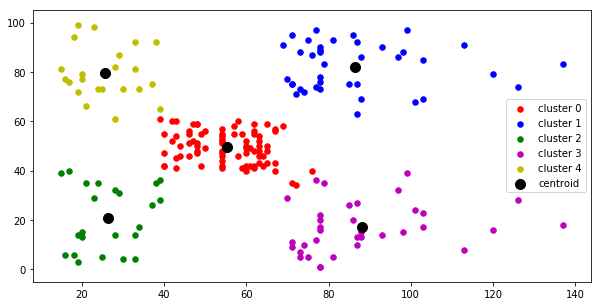

In [207]:
k = 5
allotedcentroid = {}
centroiddic = {}
costly = {}

for i in range(40):
    initial_centroids = initialize_centroids(X,k)
    Z = initial_centroids
    for j in range(15):
        y_kmean = findClosestCentroids(X, Z)
        updatecentroid = computecentroid(X, y_kmean, k)
        Z = updatecentroid
    y_kmean = np.reshape(y_kmean, [200,])
    decide[i] = y_kmean
    centroiddic[i] = updatecentroid
    costly[i] = cost(X, k, y_kmean, updatecentroid)
    
y_kmean = decide[min(costly, key = costly.get)]
updatecentroid = centroiddic[min(costly, key = costly.get)]

plt.figure(figsize = [10,5])
plt.scatter(X[y_kmean == 1, 0], X[y_kmean == 1, 1], s = 30, c= 'r', label = 'cluster 0')
plt.scatter(X[y_kmean == 2, 0], X[y_kmean == 2, 1], s = 30, c= 'b', label = 'cluster 1')
plt.scatter(X[y_kmean == 3, 0], X[y_kmean == 3, 1], s = 30, c= 'g', label = 'cluster 2')
plt.scatter(X[y_kmean == 4, 0], X[y_kmean == 4, 1], s = 30, c= 'm', label = 'cluster 3')
plt.scatter(X[y_kmean == 5, 0], X[y_kmean == 5, 1], s = 30, c= 'y', label = 'cluster 4')
plt.scatter(updatecentroid[:,0], updatecentroid[:,1], s = 100, c = 'black', label = "centroid")
plt.legend()

Choosing initial centroid manually

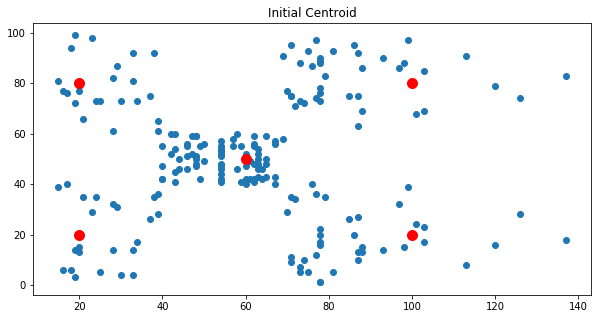

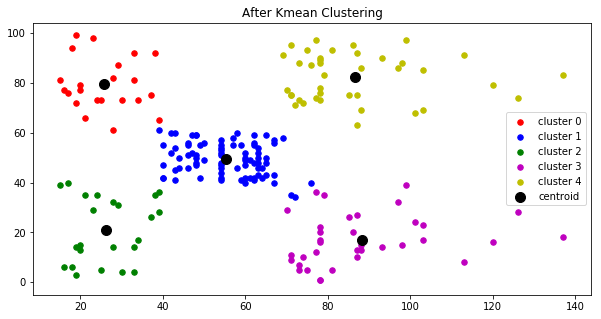

In [202]:
k = 5
initial_centroid = np.array([[20,80],
                            [60,50],
                            [20,20],
                            [100,20],
                            [100,80]])
plt.figure(figsize = [10,5])
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(initial_centroid[:, 0], initial_centroid[:, 1], c='r', s=100)
plt.title('Initial Centroid')

Z = initial_centroid
for j in range(15):
    y_kmean = findClosestCentroids(X, Z)
    updatecentroid = computecentroid(X, y_kmean, k)
    Z = updatecentroid

y_kmean = np.reshape(y_kmean, [200,])
plt.figure(figsize = [10,5])
plt.scatter(X[y_kmean == 1, 0], X[y_kmean == 1, 1], s = 30, c= 'r', label = 'cluster 0')
plt.scatter(X[y_kmean == 2, 0], X[y_kmean == 2, 1], s = 30, c= 'b', label = 'cluster 1')
plt.scatter(X[y_kmean == 3, 0], X[y_kmean == 3, 1], s = 30, c= 'g', label = 'cluster 2')
plt.scatter(X[y_kmean == 4, 0], X[y_kmean == 4, 1], s = 30, c= 'm', label = 'cluster 3')
plt.scatter(X[y_kmean == 5, 0], X[y_kmean == 5, 1], s = 30, c= 'y', label = 'cluster 4')
plt.scatter(updatecentroid[:,0], updatecentroid[:,1], s = 100, c = 'black', label = "centroid")
plt.title('After Kmean Clustering')
plt.legend()
